In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
diabetes_data = pd.read_csv('/workspaces/machine-learning-python-template-ds-2023/Ricardo/Decision-Tree/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

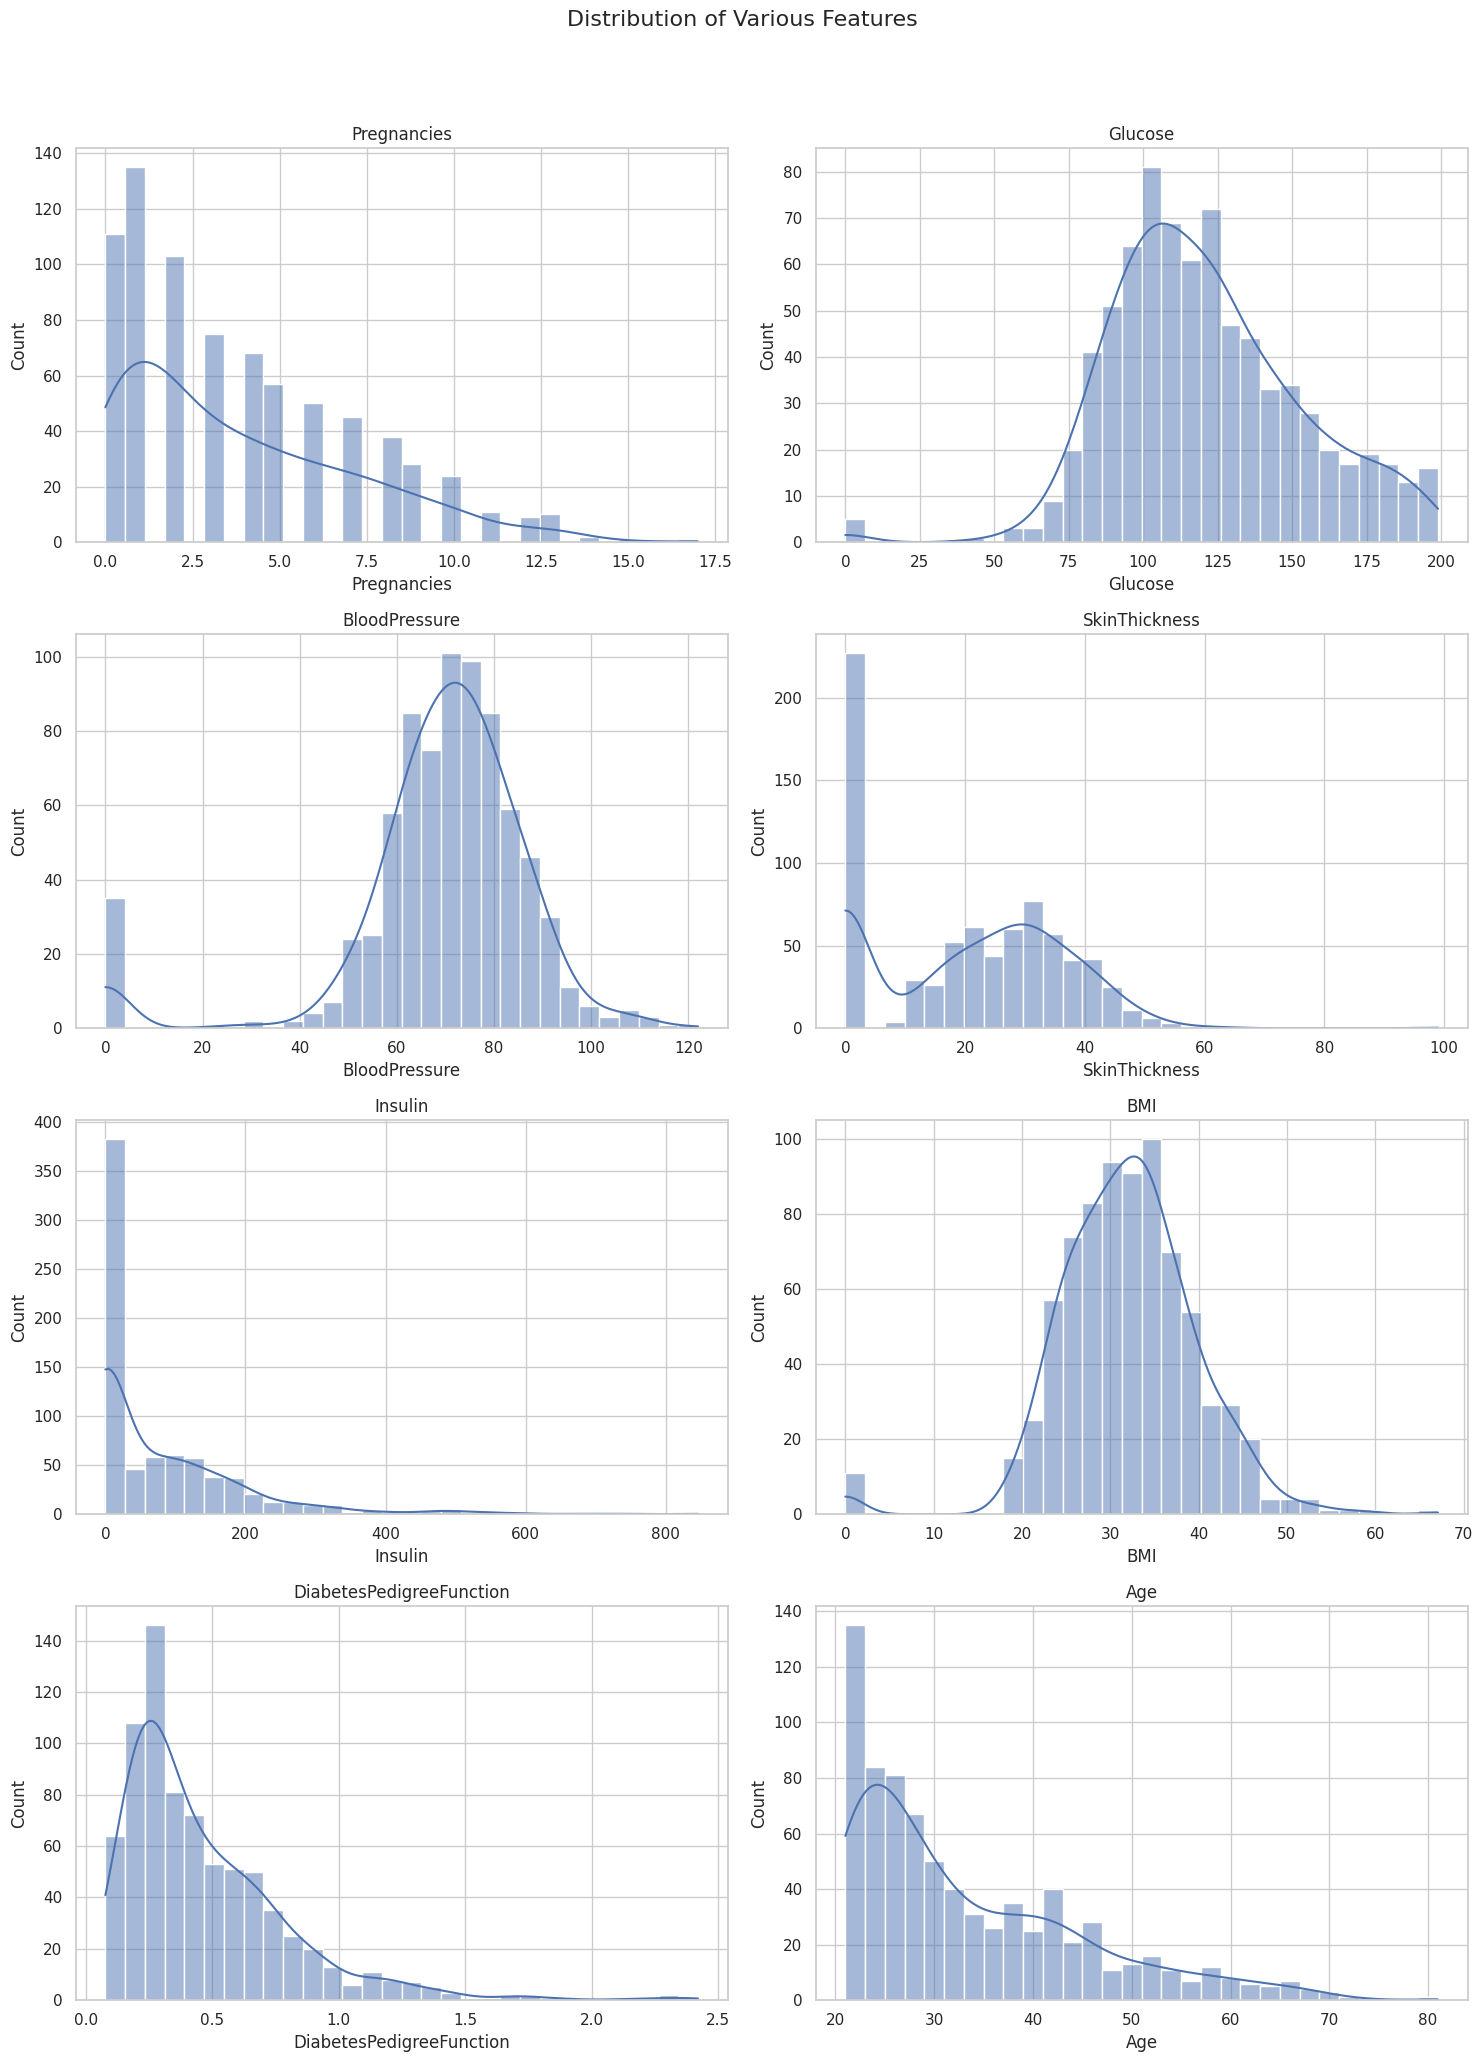

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle('Distribution of Various Features', fontsize=16, y=1.03)

columns_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i, col in enumerate(columns_to_plot):
    row = i // 2
    col_pos = i % 2
    sns.histplot(diabetes_data[col], ax=axes[row, col_pos], kde=True, bins=30)
    axes[row, col_pos].set_title(col)

plt.tight_layout()
plt.show()


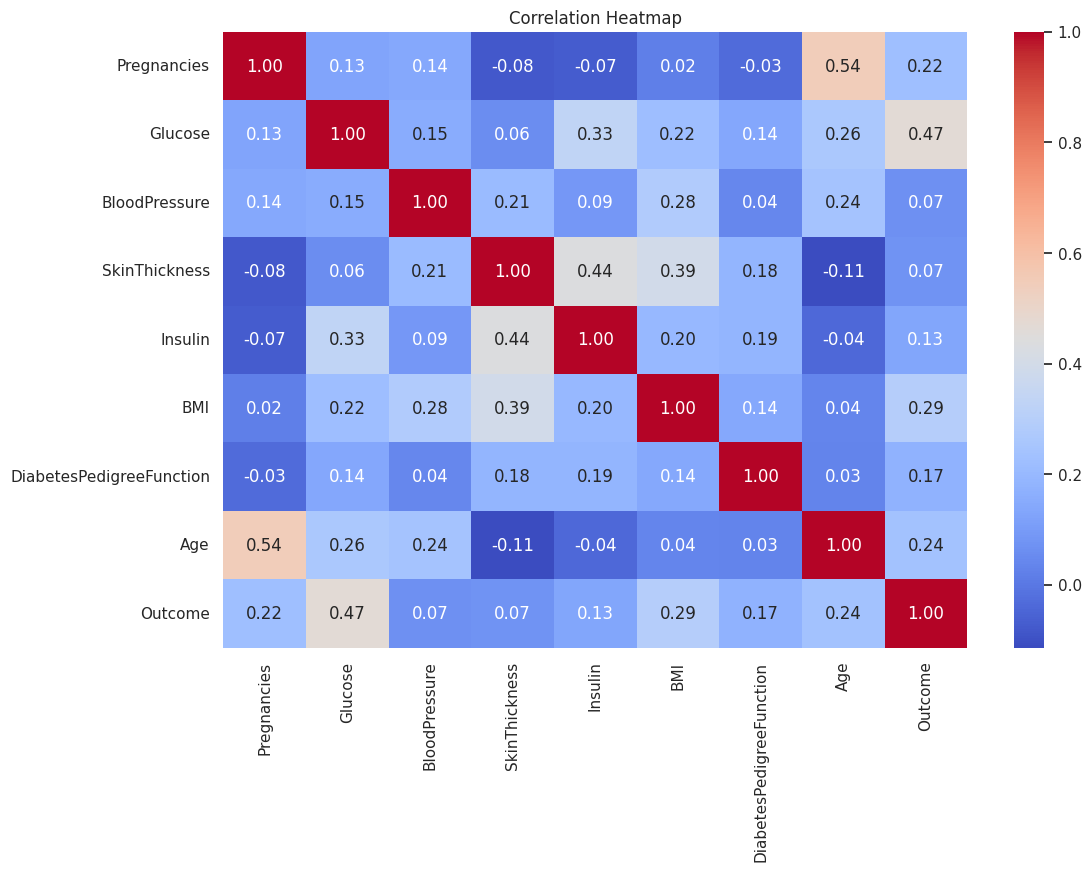

In [12]:
correlation_matrix = diabetes_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [14]:
impute_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in impute_cols:
    diabetes_data[col] = diabetes_data[col].replace(0, diabetes_data[col].mean())

In [16]:
x = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

dtree_clf = DecisionTreeClassifier(random_state=42)
dtree_clf.fit(x_train, y_train)

y_pred = dtree_clf.predict(x_test)

classification_report_results = classification_report(y_test, y_pred)
confusion_matrix_results = confusion_matrix(y_test, y_pred)

print('Classification Report:\n', classification_report_results)
print('Confusion Matrix:\n', confusion_matrix_results)

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77        99
           1       0.59      0.69      0.64        55

    accuracy                           0.72       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.72      0.72       154

Confusion Matrix:
 [[73 26]
 [17 38]]


In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7207792207792207

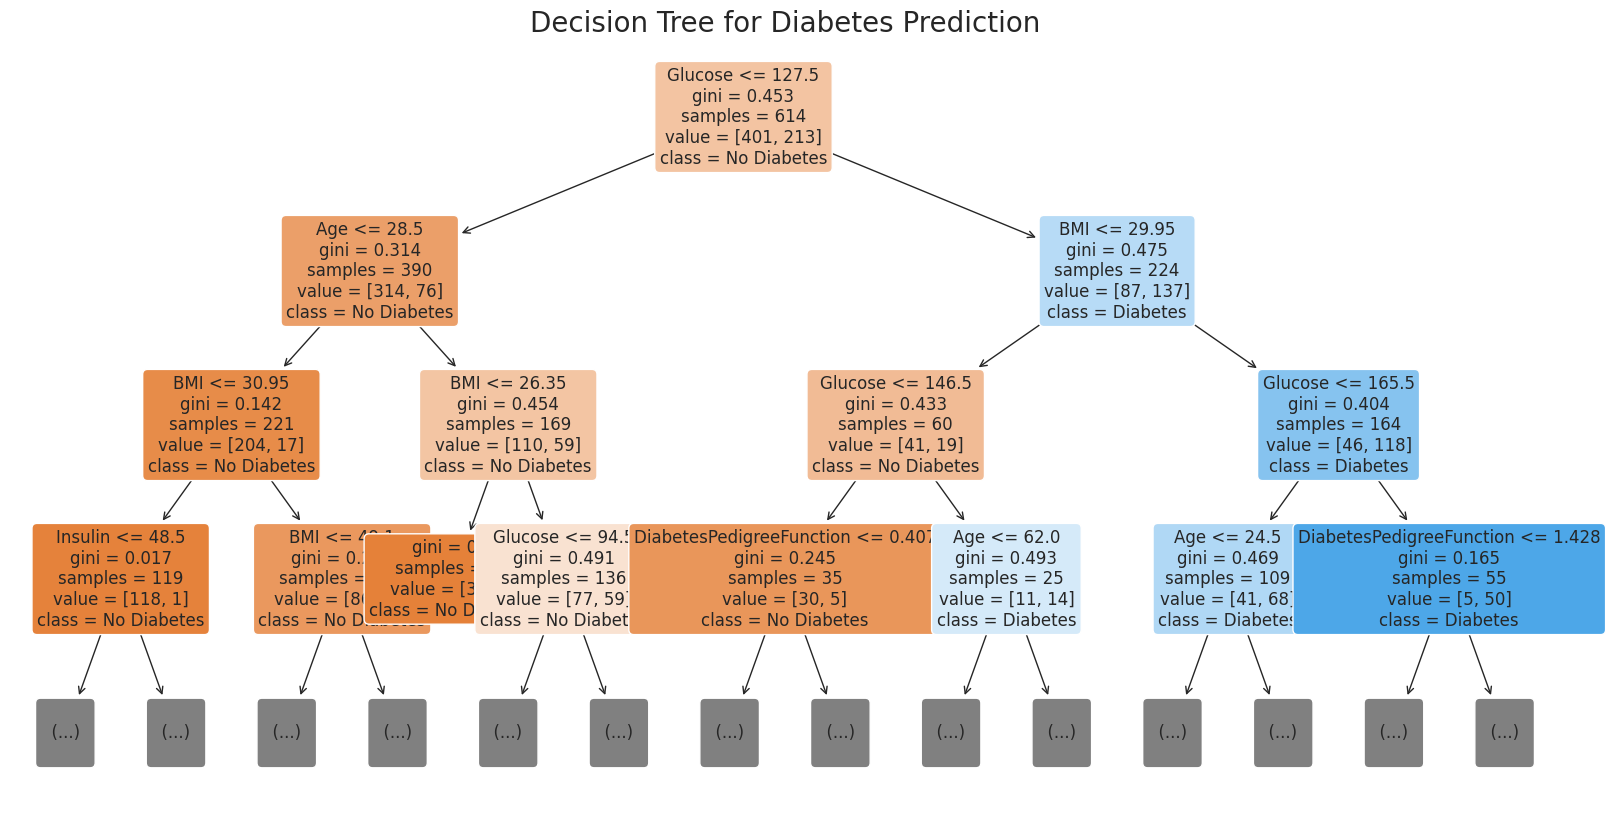

In [19]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dtree_clf, feature_names = x.columns, class_names=['No Diabetes', 'Diabetes'],
 filled=True, rounded=True, max_depth=3, fontsize=12)

plt.title('Decision Tree for Diabetes Prediction', fontsize=20)
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['gini', 'entropy'],
                'max_depth': [None, 5, 10, 20, 50],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

print('Best Parameters:', grid_search.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [33]:
dtree_clf2 = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=4, min_samples_split=10, random_state=42)
dtree_clf2.fit(x_train, y_train)

y_pred2 = dtree_clf2.predict(x_test)

classification_report_results2 = classification_report(y_test, y_pred2)
confusion_matrix_results2 = confusion_matrix(y_test, y_pred2)

print('Classification Report:\n', classification_report_results2)
print('Confusion Matrix:\n', confusion_matrix_results2)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83        99
           1       0.70      0.67      0.69        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154

Confusion Matrix:
 [[83 16]
 [18 37]]


In [34]:
accuracy_score(y_test, y_pred2)

0.7792207792207793

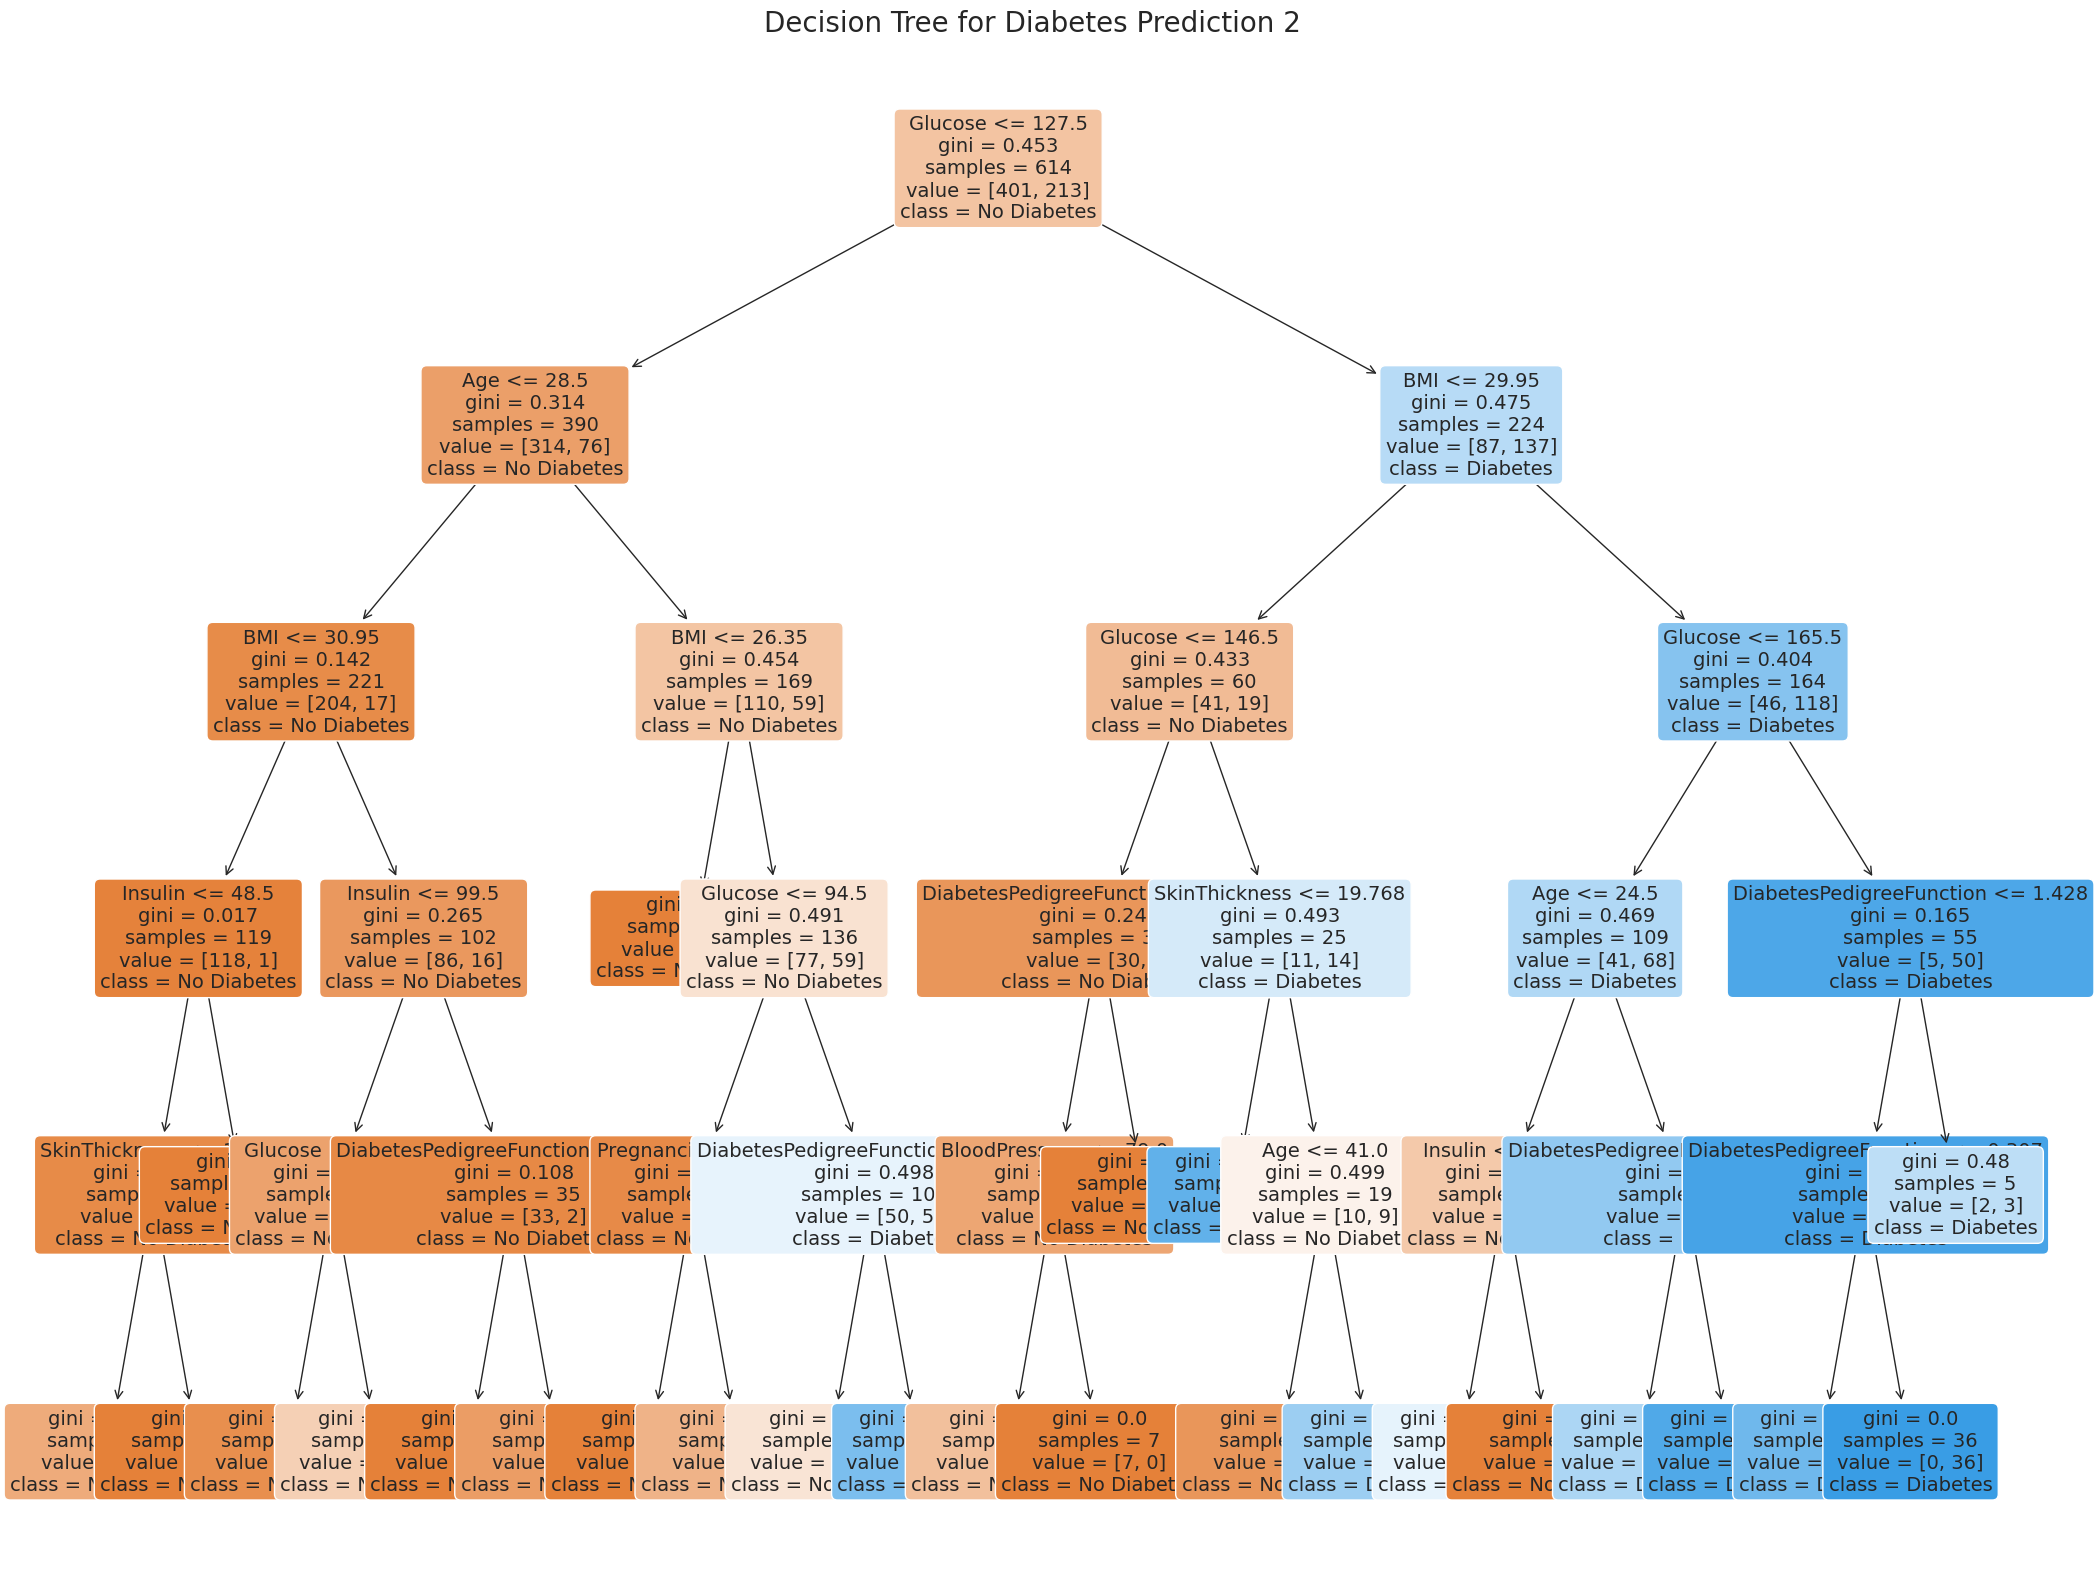

In [35]:
fig = plt.figure(figsize=(25, 20))

plot_tree(dtree_clf2, feature_names = x.columns, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True, fontsize=14)

plt.title('Decision Tree for Diabetes Prediction 2', fontsize=20)
plt.show()